### Python Integration of Nikita full atlas of myeloid cells - python

Steps to run: 
1. input object (I have full and intersected genes, try both) **done**
2. Normalise Data **done**
3. Find Variable features **done**
4. Scale data **done**
5. Run PCA **done**
6. Find Neighbors **done**
7. Run UMAP - colour by dataset_id to show integration necessary
8. perform integration - harmony or BBKNN?
9. Find neighbors 
10. Find clusters
11. run UMAP
12. visualise UMAP - colour by cancer_subtype, sample_type_major, clusters, dataset_id
13. annotate clusters
14. ...



### starting with object just containing intersecting genes (NR_data_intersect.h5ad)

In [3]:
#pip install "tools"

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 17.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 25.0 MB/s eta 0:00:000m eta 0:00:01
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46730 sha256=ec1cb8701b0581d901f8311c250283b24d0fca13876a4c485157a61018ac9fbf
  Stored in directory: /home/s4436039/.cache/pip/wheels/21/c1/ce/3732acbc72a85e35b32ff9f725f0af08dad27d409e3ebfa9e0
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-any.whl size=32868 sha256=dba01e451df2a366e2dc6388d7d704f03b4fec03eef968dafefe061e0ef5c836
  Stored in directory: /home/s4436039/.cache/pip/wheels/75/2a/25/dfcdc94033c8b2fed52c1525927e2d52a456343444de6bcb33
Successfully built tools pytils
Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install -qqq scanpy[leiden] sc-dandelion bbknn

Note: you may need to restart the kernel to use updated packages.


In [6]:
#load packages
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm

In [12]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration'

In [13]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [14]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


In [15]:
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [17]:
#read in the file
data = sc.read_h5ad('NR_data_intersect.h5ad')

In [18]:
data

AnnData object with n_obs × n_vars = 623908 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id'
    var: 'name'

In [19]:
data.obs

,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,site,sample_type_major,cancer_subtype,integration_id,ident,dataset_id
GSE215120_AM1_AAACCTGGTTGCTCCT-1,20298.000000,3789.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,0.975466,skin,primary tumour,Acral Melanoma,GSE215120_Acral_MEL_AM1,all_integrated_intersect,GSE215120
GSE215120_AM1_AAAGATGTCCAAATGC-1,5574.000000,1721.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,6.045928,skin,primary tumour,Acral Melanoma,GSE215120_Acral_MEL_AM1,all_integrated_intersect,GSE215120
GSE215120_AM1_AAAGTAGTCGGTGTTA-1,13432.000000,2759.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,2.151578,skin,primary tumour,Acral Melanoma,GSE215120_Acral_MEL_AM1,all_integrated_intersect,GSE215120
GSE215120_AM1_AAATGCCCAGAGCCAA-1,17143.000000,2659.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,1.224990,skin,primary tumour,Acral Melanoma,GSE215120_Acral_MEL_AM1,all_integrated_intersect,GSE215120
GSE215120_AM1_AAATGCCGTTTGGCGC-1,3603.000000,1012.000000,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,3.608104,skin,primary tumour,Acral Melanoma,GSE215120_Acral_MEL_AM1,all_integrated_intersect,GSE215120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTCGATGTGACGTCC,-4.871771,-10.337130,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1541.000000,ovary,primary tumour,HGSOC,GSE180661_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,all_integrated_intersect,GSE180661
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTCGATTCTGCGAGC,-4.766977,-8.292435,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,2596.000000,ovary,primary tumour,HGSOC,GSE180661_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,all_integrated_intersect,GSE180661
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTGATCGTTGCTCCT,-4.133310,-8.758132,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1200.000000,ovary,primary tumour,HGSOC,GSE180661_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,all_integrated_intersect,GSE180661
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTGGAGGTACGACAG,-9.313746,-7.889039,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,3165.000000,ovary,primary tumour,HGSOC,GSE180661_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,all_integrated_intersect,GSE180661


In [20]:
data.var

,name
FAM87B,FAM87B
LINC00115,LINC00115
FAM41C,FAM41C
SAMD11,SAMD11
NOC2L,NOC2L
...,...
MT-ND4L,MT-ND4L
MT-ND4,MT-ND4
MT-ND5,MT-ND5
MT-ND6,MT-ND6


In [27]:
#tabulate number of cells per sample type/ site/ cancer type 
pd.crosstab(data.obs["dataset_id"], data.obs["cancer_subtype"])

cancer_subtype,Acral Melanoma,BRCA1 TNBC,Breast Cancer,Breast DCIS,Breast IDC,CRC,ER Breast Cancer,GAC,GBM,HCC,HER2 Breast Cancer,HGSOC,HNSCC,Melanoma,NA,NPC,NSCLC,PDAC,TNBC,iCCA
dataset_id,,,,,,,,,,,,,,,,,,,,
GSE112271,0,0,0,0,0,0,0,0,0,7452,0,0,0,0,0,0,0,0,0,0
GSE131907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16531,0,19993,0,0,0
GSE139324,0,0,0,0,0,0,0,0,0,0,0,0,8753,0,0,0,0,0,0,0
GSE154778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1038,0,0
GSE154826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46248,0,33976,0,0,0
GSE156405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3472,0,0
GSE161529,0,4838,0,0,0,0,10105,0,0,0,4016,0,0,0,876,0,0,0,1687,0
GSE162025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2069,0,0,0,0
GSE162498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2024,0,26757,0,0,0


In [28]:
pd.crosstab(data.obs["cancer_subtype"], data.obs["sample_type_major"])

sample_type_major,ascites,healthy,local recurrence,metastatic tumour,primary tumour
cancer_subtype,,,,,
Acral Melanoma,0,0,0,0,755
BRCA1 TNBC,0,0,0,0,4838
Breast Cancer,0,0,0,0,3066
Breast DCIS,0,0,0,0,12374
Breast IDC,0,0,0,1814,2467
CRC,0,0,0,1379,3463
ER Breast Cancer,0,0,0,827,10755
GAC,0,0,0,507,2802
GBM,0,0,0,0,38643


In [29]:
pd.crosstab(data.obs["site"], data.obs["sample_type_major"])

sample_type_major,ascites,healthy,local recurrence,metastatic tumour,primary tumour
site,,,,,
ascites fluid,39292,0,0,0,0
bladder,0,0,0,1257,0
bowel,0,0,0,17940,0
brain,0,0,0,15776,38643
breast,0,1034,0,0,47321
colon,0,1056,0,0,3463
head and neck,0,0,7694,0,46786
liver,0,4300,0,14151,21671
lung,0,64803,0,10312,70368


In [30]:
pd.crosstab(data.obs["cancer_subtype"], data.obs["site"])

site,ascites fluid,bladder,bowel,brain,breast,colon,head and neck,liver,lung,lymph node,nasopharynx,omentum,ovary,pancreas,peritoneum,pleura,skin,stomach,upper abdomen,vagina
cancer_subtype,,,,,,,,,,,,,,,,,,,,
Acral Melanoma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,755,0,0,0
BRCA1 TNBC,0,0,0,0,4838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Breast Cancer,0,0,0,0,3066,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Breast DCIS,0,0,0,0,12374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Breast IDC,0,0,0,0,2467,0,0,0,0,1814,0,0,0,0,0,0,0,0,0,0
CRC,0,0,0,0,0,3463,0,0,0,0,0,0,0,0,1379,0,0,0,0,0
ER Breast Cancer,0,0,0,0,10755,0,0,0,0,827,0,0,0,0,0,0,0,0,0,0
GAC,0,0,0,0,0,0,0,163,0,0,0,0,344,0,0,0,0,2802,0,0
GBM,0,0,0,38643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
## Repeating this as a percentage
# You'll just have the function that does row/row.sum(), and you use apply with axis=1 to apply it by row (or across and not within columns).

pd.crosstab(data.obs["cancer_subtype"], data.obs["site"]).apply(
    lambda row: row / row.sum() * 100, axis=1
)

site,ascites fluid,bladder,bowel,brain,breast,colon,head and neck,liver,lung,lymph node,nasopharynx,omentum,ovary,pancreas,peritoneum,pleura,skin,stomach,upper abdomen,vagina
cancer_subtype,,,,,,,,,,,,,,,,,,,,
Acral Melanoma,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.00000,0.000000,0.000000
BRCA1 TNBC,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Breast Cancer,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Breast DCIS,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Breast IDC,0.000000,0.000000,0.000000,0.000000,57.626723,0.000000,0.000000,0.000000,0.000000,42.373277,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
CRC,0.000000,0.000000,0.000000,0.000000,0.000000,71.520033,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,28.479967,0.000000,0.000000,0.00000,0.000000,0.000000
ER Breast Cancer,0.000000,0.000000,0.000000,0.000000,92.859610,0.000000,0.000000,0.000000,0.000000,7.140390,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
GAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.925960,0.000000,0.000000,0.0,0.000000,10.395890,0.000000,0.000000,0.000000,0.000000,84.67815,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


### Normalise data:

In [32]:
sc.pp.normalize_total(data, target_sum=1e4)

# Logarithmize the data:
sc.pp.log1p(data)

# check the object
data

AnnData object with n_obs × n_vars = 623908 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id'
    var: 'name'
    uns: 'log1p'

### Identify highly variable genes:

In [33]:
# (Expects logarithimised data)
sc.pp.highly_variable_genes(data, min_mean=0.0125, max_mean=3, min_disp=0.5)
data

AnnData object with n_obs × n_vars = 623908 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [34]:
# to see genes
data.var  # there is now a hvg column

,name,highly_variable,means,dispersions,dispersions_norm
FAM87B,FAM87B,False,0.003131,1.017997,-1.808694
LINC00115,LINC00115,False,0.033554,1.597652,-0.425234
FAM41C,FAM41C,False,0.022248,1.542000,-0.558058
SAMD11,SAMD11,False,0.002381,1.669414,-0.253960
NOC2L,NOC2L,False,0.233704,1.515548,-0.621190
...,...,...,...,...,...
MT-ND4L,MT-ND4L,True,2.498015,4.540784,1.878395
MT-ND4,MT-ND4,False,4.173388,4.378180,0.304262
MT-ND5,MT-ND5,True,2.894607,3.346545,0.625154
MT-ND6,MT-ND6,True,1.132630,3.572825,4.222325


In [36]:
#to get structure of dataframe
data.var.info()
data.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15074 entries, FAM87B to MT-CYB
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15074 non-null  object 
 1   highly_variable   15074 non-null  bool   
 2   means             15074 non-null  float64
 3   dispersions       15074 non-null  float64
 4   dispersions_norm  15074 non-null  float32
dtypes: bool(1), float32(1), float64(2), object(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 623908 entries, GSE215120_AM1_AAACCTGGTTGCTCCT-1 to GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TTTGGTTGTGTACAGG
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   nCount_RNA         623908 non-null  float64 
 1   nFeature_RNA       623908 non-null  float64 
 2   sample_type        623908 non-null  category
 3   cancer_type        623908 non-null 

In [38]:
#to get number of HV genes (because the column "highly_variable" is a boolean vector - ie it gives True (1) or False (0), you can use sum function to know)
print(data.var.highly_variable.sum())

1634


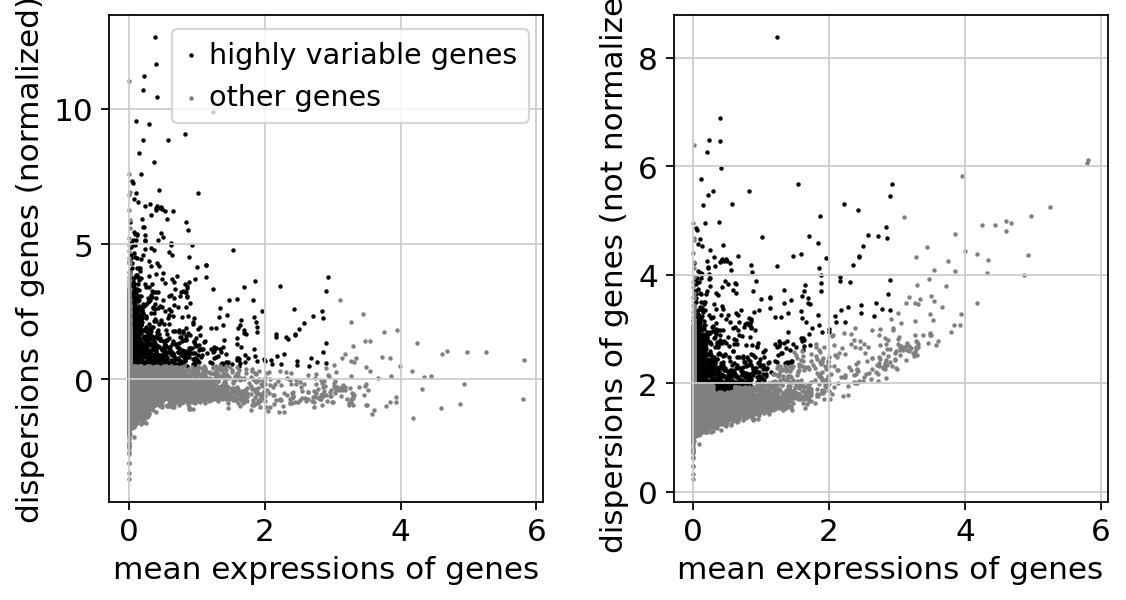

In [39]:
#plot out the number of highly variable genes
sc.pl.highly_variable_genes(data)

### Perform dimensionality reduction and scaling:

In [40]:
# Actually do the filtering for PCA
data = data[
    :, data.var.highly_variable
].copy()  # all rows/indexes : columns only selecting for those within high_variable, and then making a copy of itself
data

AnnData object with n_obs × n_vars = 623908 × 1634
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

# next step: Regress out effects of "total_counts" per cell and percentage of mt genes expressed ("pct_counts_mt"). --> skipped this step as I believe already done for each dataset

In [41]:
# Scale each gene to unit variance. Clip values exceeding std of 10.
sc.pp.scale(data, max_value=10)

In [42]:
## get PCA
sc.tl.pca(data, svd_solver="arpack")

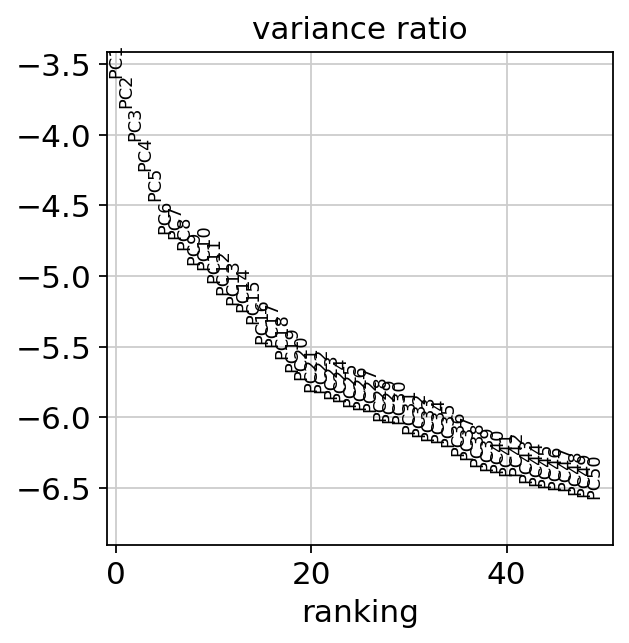

In [43]:
# get elbow plot to see variance contribution by each pc
sc.pl.pca_variance_ratio(data, log=True, n_pcs=50)

### Neighborhood graph:

In [44]:
## Computing neighbourhood graph - here UMAP
sc.pp.neighbors(data, n_neighbors=10, n_pcs=40)

## n_neighbor: The size of local neighborhood (in terms of number of neighboring data points) used for manifold approximation. Larger values result in more global views of the manifold, 
# while smaller values result in more local data being preserved. In general values should be in the range 2 to 100.
# If `knn` is `True`, number of nearest neighbors to be searched. If `knn` is `False`, a Gaussian kernel width is set to the distance of the `n_neighbors` neighbor.

### UMAP Visualisation:

In [45]:
#Embedding the neighbourhood graph using UMAP
sc.tl.umap(data, min_dist=0.3)  # 0.3 is personal preference

In [47]:
#write out object
import time
t0 = time.time()
fn = 'test.h5ad'
data.write_h5ad(fn,compression='gzip')
print('%.1f seconds passed'%(time.time()-t0))
data

59.6 seconds passed


AnnData object with n_obs × n_vars = 623908 × 1634
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [46]:
#visualise UMAP
c.pl.umap(
    data,
    color=[
        "sample_type_major",
        "cancer_subtype",
        "dataset_id",
    ],
    ncols=1,
)

NameError: name 'c' is not defined

## Integration: 